In [1]:
import csv
import numpy as np

import sys

from numpy import linalg as LA

from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import SGDClassifier

import matplotlib.pylab as plt
from io import StringIO

## Load the data as numpy arrays 
* 1- Check the data size in the training and testing data set 
* 2- The labels are on the last column

In [2]:

# Load the dataset as numpy 

ionoTrain = np.genfromtxt("data/ionosphere/preprocessed_ionosphere_train.csv", delimiter=',')
ionoTest = np.genfromtxt("data/ionosphere/preprocessed_ionosphere_test.csv", delimiter=',')

# Separate features from target (Complete the code)
X_train = ionoTrain[:,0:34]
y_train = ionoTrain[:,34]

X_test = ionoTest[:,0:34]
y_test = ionoTest[:,34]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)



(269, 34)
(269,)
(82, 34)
(269,)


## SGD for Logistic Regression with no Regularizer with fixed learning step size

These two manuals for SGDClassifier from Sklearn library and the log_loss definition can be helpful for you.  

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

You need to be careful when you sepecify the parameters for these methods to serve what you want to do. 

In this question, we will use SGD for classification by sepecifying:
* learning step sizes: $\eta = \{0.001, 0.01, 0.05, 0.1, 0.5\}$

* Max iteration = 100 (Remember SGD can coverge faster that the number of the specified iterations)

* No regularization

* Loss function is the logistic regression loss (cross-entropy loss)

* Use the verbose mode to monitor how the loss function is changing during training SGD. There is no method that can report how the loss function is changing so we will print the verbose and then parse this output to know how the loss function is changing.

* Fix the random seed for repeatability of the results (remember SGD picks the samples at random)

Please read the HW manual instruction to know what you need to report. 



For ETA = 0.001 ---------------------------------

Number of iterations is: 81

The L2 norm is: 1.9274219477294026

The accuracy for this model is: 0.8658536585365854





For ETA = 0.01 ---------------------------------

Number of iterations is: 67

The L2 norm is: 5.031686683644946

The accuracy for this model is: 0.9024390243902439





For ETA = 0.05 ---------------------------------

Number of iterations is: 32

The L2 norm is: 7.185153147281853

The accuracy for this model is: 0.9146341463414634





For ETA = 0.1 ---------------------------------

Number of iterations is: 23

The L2 norm is: 8.371175102365134

The accuracy for this model is: 0.8658536585365854





For ETA = 0.5 ---------------------------------

Number of iterations is: 27

The L2 norm is: 22.693423709414713

The accuracy for this model is: 0.8170731707317073






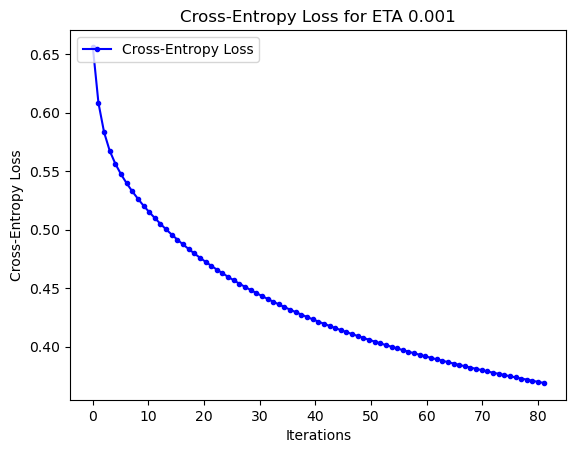

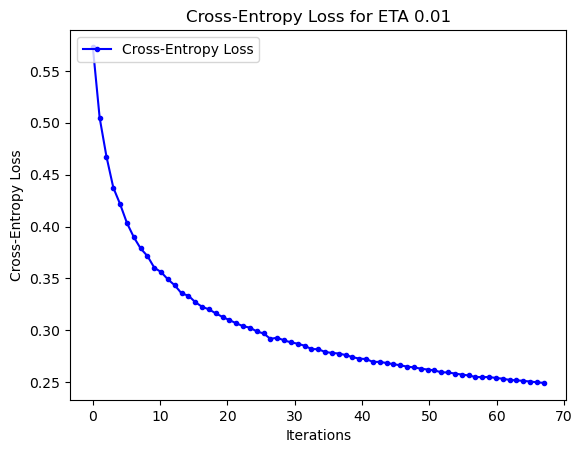

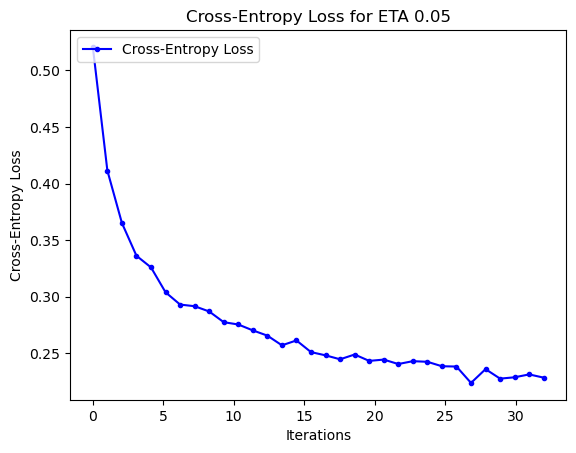

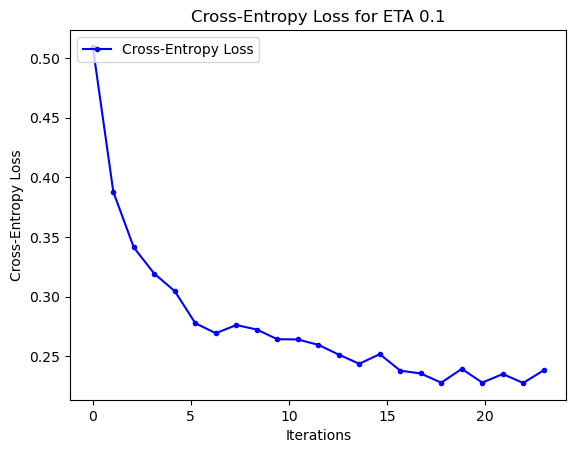

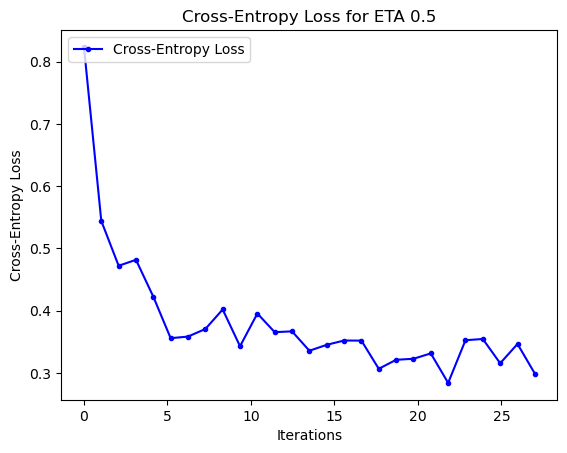

In [3]:
# Q2) 

stepsize = [0.001, 0.01, 0.05, 0.1, 0.5]

loss_list = {} # a dictionary to hold the cross-entropy loss during training

for eta in stepsize: 
    
    loss_list[eta] = [] # initialize the loss reported for this eta 
    
    
    # ---------These bounded sentences are used to monitor the verbose output-----------#
    old_stdout = sys.stdout 
    sys.stdout = mystdout = StringIO()
    # ------------------------------------------------------------------------------------#
    
    logit = SGDClassifier(loss='log', learning_rate = 'constant', random_state=0, verbose=1, max_iter=100, eta0 = eta, alpha = 0.0) # complete the parameters
    
    # Fit your model 
    logit.fit(X_train, y_train)
    
    # Get the coefficients of the your learnt model (Remember you have the bias term and the weights)
        #this is at the bottom 
    
    # Calculate the L2 norm of these coefficients 
        #at bottom
    
    # Get the accuracy score of predicting the training data
    y_predictedOutcome = logit.predict(X_test)
    
    
    # ---------These bounded sentences are used to parse the verbose output-----------#
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.get(eta).append(float(line.split("loss: ")[-1]))
   # ----------------------------------------------------------------------------------#

        
    #print(loss_list[eta])    loss for a specific eta
    
    #eta
    print("\nFor ETA = " + str(eta) + " ---------------------------------")
    
    #iterations
    print("\nNumber of iterations is: " + str(logit.n_iter_) )
    
    #L2 Norm
    print( "\nThe L2 norm is: " + str(LA.norm(logit.coef_) ) )

    #coefficients
    #print("\nThe coefficients of this learning model are: ")
    #print(logit.coef_)

    #accuracy score
    print("\nThe accuracy for this model is: " + str(accuracy_score(y_test, y_predictedOutcome)))
    
    print("\n\n\n")

   # Plot the cross-entropy loss with respect to the T=[1, ..., 100] (can be less than that) for this particular eta
    plt.figure()
    plt.title("Cross-Entropy Loss for ETA " + str(eta))
    plt.xlabel("Iterations")
    plt.ylabel("Cross-Entropy Loss")
    xAxis = np.linspace(0, len(loss_list[eta]), logit.n_iter_)
    plt.plot(xAxis, loss_list[eta], 'b.', linestyle = "solid", label="Cross-Entropy Loss")
    plt.legend(loc="upper left")
    
    




## SGD for Logistic Regression with Regularizer with fixed learning step size

These two manuals for SGDClassifier from Sklearn library and the log_loss definition can be helpful for you.  

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss

You need to be careful when you sepecify the parameters for these methods to serve what you want to do. 

In this question, we will use SGD for classification by sepecifying:
* learning step sizes: $\eta = \{0.001, 0.01, 0.05, 0.1, 0.5\}$

* Regularizer Coefficient $\lambda = \{ 0, 0.05, 0.1, 0.15, ..., 0.5\}$ with $L_2$ penalty

* Max iteration = 100 (Remember SGD can coverge faster that the number of the specified iterations)

* Loss function is the logistic regression loss (cross-entropy loss)

* Use the verbose mode to monitor how the loss function is changing during training SGD. There is no method that can report how the loss function is changing so we will print the verbose and then parse this output to know how the loss function is changing.

* Fix the random seed for repeatability of the results (remember SGD picks the samples at random)

Please read the HW manual instruction to know what you need to report. 



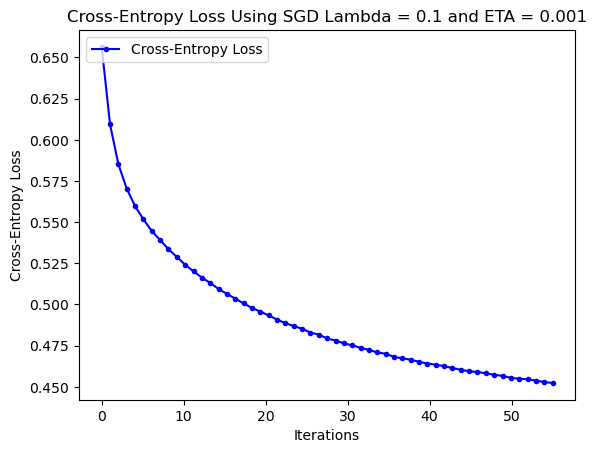

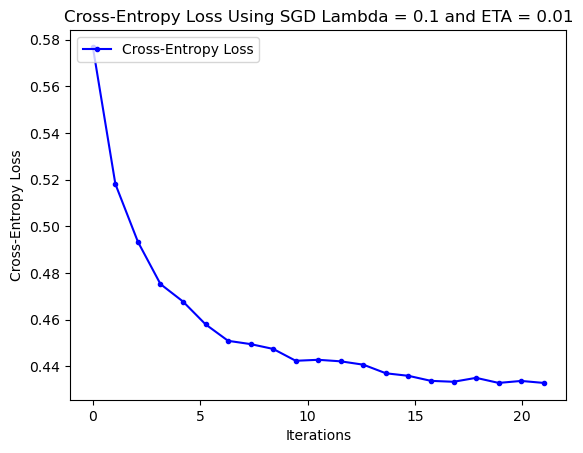

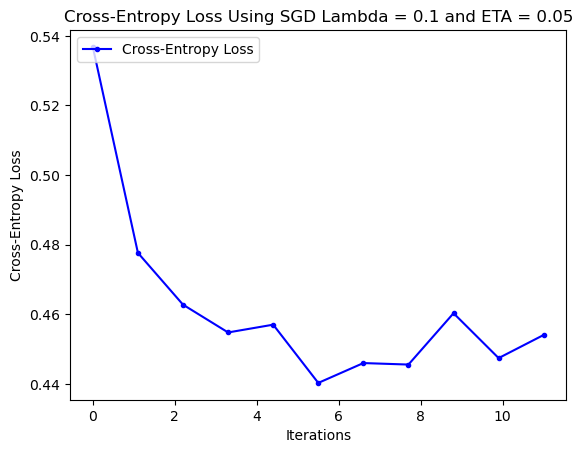

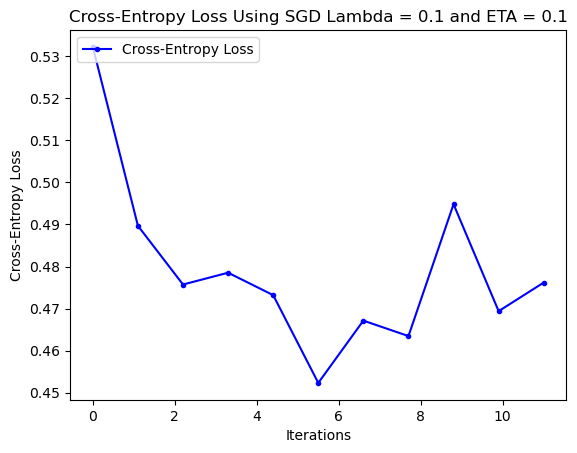

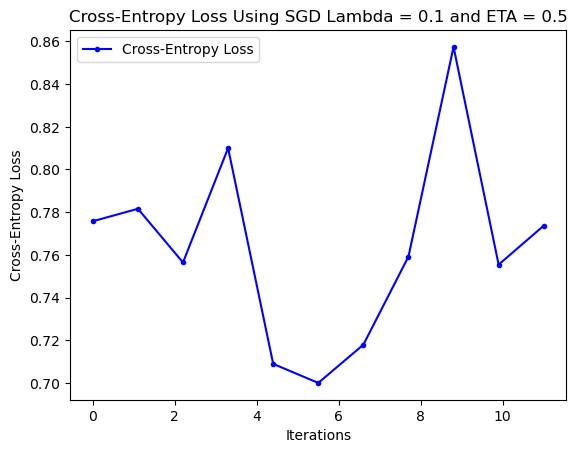

In [4]:
# Q3:a) lambda = 0.1 and eta = {0.001, 0.01, 0.05, 0.1, 0.5}

loss_list = {} # a dictionary to hold the cross-entropy loss during training

for eta in stepsize: 
    #print('Regularized Logistic Regression with SGD using lambda = 0.1 and eta = ', eta)
    loss_list[eta] = [] # initialize the loss reported for this eta 
    
    
    # ---------These bounded sentences are used to monitor the verbose output-----------#
    old_stdout = sys.stdout 
    sys.stdout = mystdout = StringIO()
    # ------------------------------------------------------------------------------------#
    
    logit = SGDClassifier(loss='log', random_state=0, verbose=1, max_iter=100, eta0 = eta, alpha = 0.1, learning_rate='constant') # complete the parameters

    logit.fit(X_train, y_train)
    
    # Get the accuracy score of predicting the training data
    y_predictedOutcome = logit.predict(X_test)
    
    # ---------These bounded sentences are used to parse the verbose output-----------#
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.get(eta).append(float(line.split("loss: ")[-1]))
    # ----------------------------------------------------------------------------------#

    """
    #coefficients
    print("\nThe coefficients of this learning model are: ")
    print(logit.coef_)
    
    print("\neta0:")
    print(eta)
    
    print("\nNumber of iterations is:")
    print(logit.n_iter_)
    
    #L2 Norm
    print("\nThe L2 nom is:")
    print(LA.norm(logit.coef_))
    
    #accuracy score
    print("\nThe accuracy for this model is:")
    print(accuracy_score(y_test, y_predictedOutcome))
    
    print("\n\n\n")
    
    """

    # Plot the cross-entropy loss with respect to the T=[1, ..., 100] (can be less than that) for this particular eta
    plt.figure()
    plt.title("Cross-Entropy Loss Using SGD Lambda = 0.1 and ETA = " + str(eta))
    plt.xlabel("Iterations")
    plt.ylabel("Cross-Entropy Loss")
    xAxis = np.linspace(0, len(loss_list[eta]), logit.n_iter_)
    plt.plot(xAxis, loss_list[eta], 'b.', linestyle = "solid", label="Cross-Entropy Loss")
    plt.legend(loc="upper left")



In [5]:
# Q3:b, c, d) eta = 0.01 and lambda = {0,0.05,0.1,0.15,...,0.5}


regcoeff = np.arange(0, 0.55, 0.05)


for regularizer in regcoeff: 
    regularizer = round(regularizer, 2) # To avoid the floating point problems.
   
    ############# Complete your code here #############
    # Use samples, the examples, and steps in the previous question to help you complete this one. 
    loss_list[eta] = [] # initialize the loss reported for this eta 
    
    
    # ---------These bounded sentences are used to monitor the verbose output-----------#
    old_stdout = sys.stdout 
    sys.stdout = mystdout = StringIO()
    # ------------------------------------------------------------------------------------#
    
    logit = SGDClassifier(loss='log', random_state=0, verbose=1, max_iter=100, eta0 = 0.01, alpha = regularizer, learning_rate = 'constant') # complete the parameters

    logit.fit(X_train, y_train)
    
    # Get the accuracy score of predicting the training data
    y_predictedOutcome = logit.predict(X_test)
    
    # ---------These bounded sentences are used to parse the verbose output-----------#
    sys.stdout = old_stdout
    loss_history = mystdout.getvalue()
    
    for line in loss_history.split('\n'):
        if(len(line.split("loss: ")) == 1):
            continue
        loss_list.get(eta).append(float(line.split("loss: ")[-1]))
   # ----------------------------------------------------------------------------------#
    #regularizer
    print("\nFor regularizer = " + str(regularizer) + " ---------------------------------")
    
    #iterations
    print("\nNumber of iterations is: " + str(logit.n_iter_) )
    
    #L2 Norm
    print( "\nThe L2 norm is: " + str(LA.norm(logit.coef_) ) )
    
    #accuracy score
    print("\nThe accuracy for this model is: " + str(accuracy_score(y_test, y_predictedOutcome)) )
    
    print("\n\n\n")


For regularizer = 0.0 ---------------------------------

Number of iterations is: 67

The L2 norm is: 5.031686683644946

The accuracy for this model is: 0.9024390243902439





For regularizer = 0.05 ---------------------------------

Number of iterations is: 31

The L2 norm is: 1.6540002787112258

The accuracy for this model is: 0.9024390243902439





For regularizer = 0.1 ---------------------------------

Number of iterations is: 21

The L2 norm is: 1.1712548188747935

The accuracy for this model is: 0.8902439024390244





For regularizer = 0.15 ---------------------------------

Number of iterations is: 21

The L2 norm is: 0.9467094952229311

The accuracy for this model is: 0.8658536585365854





For regularizer = 0.2 ---------------------------------

Number of iterations is: 21

The L2 norm is: 0.8037131073192852

The accuracy for this model is: 0.8536585365853658





For regularizer = 0.25 ---------------------------------

Number of iterations is: 12

The L2 norm is: 0.665

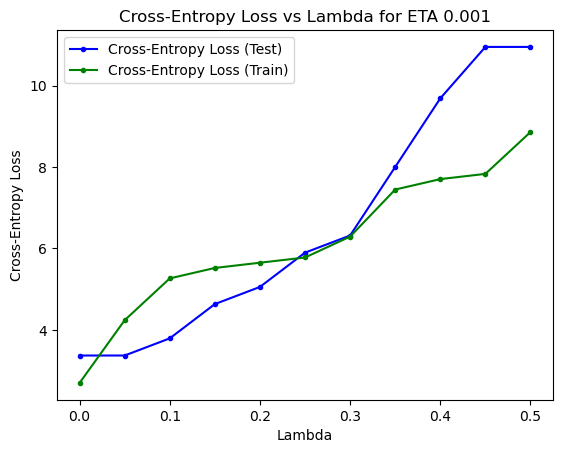

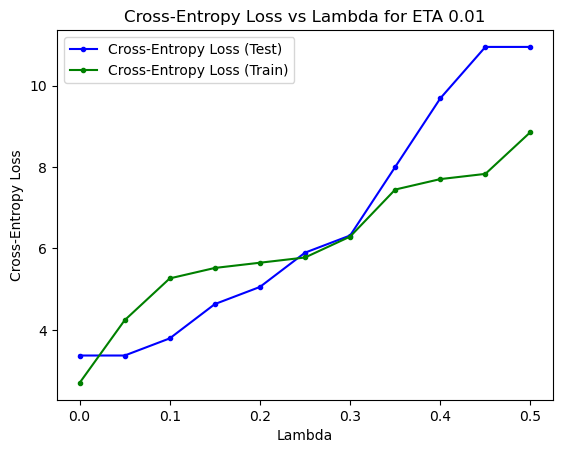

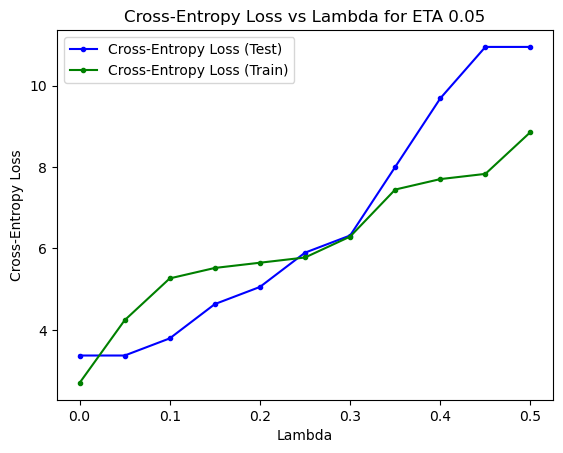

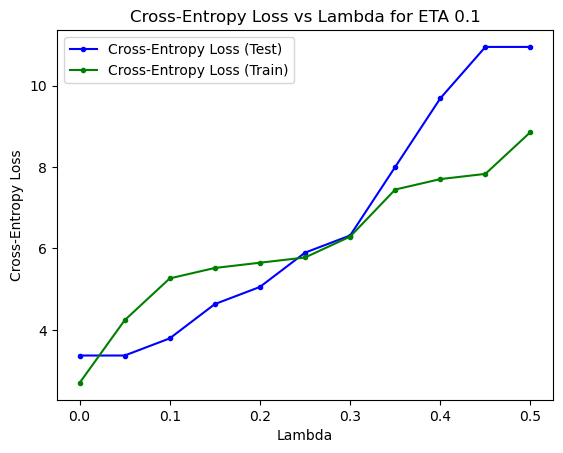

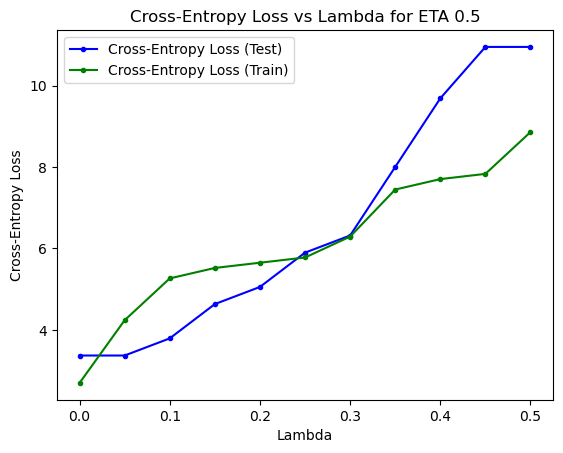

In [6]:
# Q3:e) eta = {0.001, 0.01, 0.05, 0.1, 0.5}, lambda = {0,0.05,0.1,0.15,...,0.5}


regcoeff = np.arange(0, 0.55, 0.05)
stepsize = [0.001, 0.01, 0.05, 0.1, 0.5]

finalCrossEntropyVal = []
finalCrossEntropyValTrain = []

for eta in stepsize: 
    finalCrossEntropyVal.clear()
    finalCrossEntropyValTrain.clear()
    for regularizer in regcoeff: 
        regularizer = round(regularizer, 2) # To avoid the floating point problems.
        
        # ############# Complete your code here #############
        # Use samples, the examples, and steps in the previous question to help you complete this one. 
        # In this problem, you only need to get the final cross-entropy loss at the end of the training for your training data and testing data
        # You will need to use #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss
        
        regularizer = round(regularizer, 2) # To avoid the floating point problems.
   
        ############# Complete your code here #############
        # Use samples, the examples, and steps in the previous question to help you complete this one. 
        loss_list[eta] = [] # initialize the loss reported for this eta 
    
    
        # ---------These bounded sentences are used to monitor the verbose output-----------#
        old_stdout = sys.stdout 
        sys.stdout = mystdout = StringIO()
        # ------------------------------------------------------------------------------------#
    
        logit = SGDClassifier(loss='log', random_state=0, verbose=1, max_iter=100, eta0 = 0.01, alpha = regularizer, learning_rate = 'constant') # complete the parameters

        logit.fit(X_train, y_train)
    
        # ---------These bounded sentences are used to parse the verbose output-----------#
        sys.stdout = old_stdout
        loss_history = mystdout.getvalue()
    
        for line in loss_history.split('\n'):
            if(len(line.split("loss: ")) == 1):
                continue
            loss_list.get(eta).append(float(line.split("loss: ")[-1]))
        # ----------------------------------------------------------------------------------#
    
        y_predictedOutcome = logit.predict(X_test)
        y_trainPredictedOutcome = logit.predict(X_train)
        
        """
        
        #coefficients
        print("\nThe coefficients of this learning model are: ")
        print(logit.coef_)
    
        #eta
        print("\neta0:")
        print(eta)
    
        print("\nNumber of iterations is:")
        print(logit.n_iter_)
    
        #L2 Norm
        print("\nThe L2 nom is:")
        print(LA.norm(logit.coef_))
    
        #accuracy score
        print("\nThe accuracy for this model is:")
        print(accuracy_score(y_test, y_predictedOutcome))
    
        print("\n\n\n")
        
        """
        
        #finalCross 
        finalCrossEntropyVal.append(log_loss(y_test, y_predictedOutcome))
        finalCrossEntropyValTrain.append(log_loss(y_train, y_trainPredictedOutcome))

    #you print here
    #your print here
    plt.figure()
    plt.title("Cross-Entropy Loss vs Lambda for ETA " + str(eta))
    plt.xlabel("Lambda")
    plt.ylabel("Cross-Entropy Loss")
    plt.plot(regcoeff, finalCrossEntropyVal, 'b.', linestyle = "solid", label="Cross-Entropy Loss (Test)")
    plt.plot(regcoeff, finalCrossEntropyValTrain, 'g.', linestyle = "solid", label="Cross-Entropy Loss (Train)")
    plt.legend(loc="upper left")


